In [23]:
import pandas as pd
import numpy as np

import json

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

matplotlib.rcParams['figure.figsize'] = (10, 10)

file_name = 'USvideos.csv' # change this if you want to read a different dataset
my_dfus = pd.read_csv(file_name, index_col='video_id',encoding="utf-8")
my_df.head()
file_name = 'CAvideos.csv' # change this if you want to read a different dataset
my_dfca = pd.read_csv(file_name, index_col='video_id',encoding="utf-8")
file_name = 'DEvideos.csv' # change this if you want to read a different dataset
my_dfde = pd.read_csv(file_name, index_col='video_id',encoding="utf-8")
file_name = 'FRvideos.csv' # change this if you want to read a different dataset
my_dffr = pd.read_csv(file_name, index_col='video_id',encoding="utf-8")
file_name = 'GBvideos.csv' # change this if you want to read a different dataset
my_dfgb = pd.read_csv(file_name, index_col='video_id',encoding="utf-8")


In [24]:
my_dfus['trending_date'] = pd.to_datetime(my_df['trending_date'], format='%y.%d.%m')
my_dfus['trending_date'].head()
my_dfca['trending_date'] = pd.to_datetime(my_df['trending_date'], format='%y.%d.%m')
my_dfde['trending_date'] = pd.to_datetime(my_df['trending_date'], format='%y.%d.%m')
my_dffr['trending_date'] = pd.to_datetime(my_df['trending_date'], format='%y.%d.%m')
my_dfgb['trending_date'] = pd.to_datetime(my_df['trending_date'], format='%y.%d.%m')

In [28]:
my_dfus['publish_time'] = pd.to_datetime(my_dfus['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
my_dfus['publish_time'].head()
my_dfca['publish_time'] = pd.to_datetime(my_dfca['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
my_dfde['publish_time'] = pd.to_datetime(my_dfde['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
#my_dffr['publish_time'] = pd.to_datetime(my_dffr['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
my_dfgb['publish_time'] = pd.to_datetime(my_dfgb['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [30]:
my_dfus.insert(4, 'publish_date', my_dfus['publish_time'].dt.date)
my_dfus['publish_time'] = my_dfus['publish_time'].dt.time
my_dfus[['publish_date', 'publish_time']].head()

,publish_date,publish_time
video_id,,
2kyS6SvSYSE,2017-11-13,17:13:01
1ZAPwfrtAFY,2017-11-13,07:30:00
5qpjK5DgCt4,2017-11-12,19:05:24
puqaWrEC7tY,2017-11-13,11:00:04
d380meD0W0M,2017-11-12,18:01:41


In [32]:
type_int_list = ['views', 'likes', 'dislikes', 'comment_count']
for column in type_int_list:
    my_dfus[column] = my_dfus[column].astype(int)

type_str_list = ['category_id']
for column in type_str_list:
    my_dfus[column] = my_dfus[column].astype(str)

In [33]:
id_to_category = {}

with open('US_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        id_to_category[category['id']] = category['snippet']['title']

id_to_category

{u'1': u'Film & Animation',
 u'10': u'Music',
 u'15': u'Pets & Animals',
 u'17': u'Sports',
 u'18': u'Short Movies',
 u'19': u'Travel & Events',
 u'2': u'Autos & Vehicles',
 u'20': u'Gaming',
 u'21': u'Videoblogging',
 u'22': u'People & Blogs',
 u'23': u'Comedy',
 u'24': u'Entertainment',
 u'25': u'News & Politics',
 u'26': u'Howto & Style',
 u'27': u'Education',
 u'28': u'Science & Technology',
 u'29': u'Nonprofits & Activism',
 u'30': u'Movies',
 u'31': u'Anime/Animation',
 u'32': u'Action/Adventure',
 u'33': u'Classics',
 u'34': u'Comedy',
 u'35': u'Documentary',
 u'36': u'Drama',
 u'37': u'Family',
 u'38': u'Foreign',
 u'39': u'Horror',
 u'40': u'Sci-Fi/Fantasy',
 u'41': u'Thriller',
 u'42': u'Shorts',
 u'43': u'Shows',
 u'44': u'Trailers'}

In [34]:
my_dfus.insert(4, 'category', my_dfus['category_id'].map(id_to_category))
my_dfus[['category_id', 'category']].head()

,category_id,category
video_id,,
2kyS6SvSYSE,22,People & Blogs
1ZAPwfrtAFY,24,Entertainment
5qpjK5DgCt4,23,Comedy
puqaWrEC7tY,24,Entertainment
d380meD0W0M,24,Entertainment


In [35]:
keep_columns = ['views', 'likes', 'dislikes', 'comment_count'] # only looking at correlations between these variables
corr_matrix = my_df[keep_columns].corr()
corr_matrix


,views,likes,dislikes,comment_count
views,1.000000,0.814026,0.504649,0.564671
likes,0.814026,1.000000,0.444664,0.716254
dislikes,0.504649,0.444664,1.000000,0.821993
comment_count,0.564671,0.716254,0.821993,1.000000


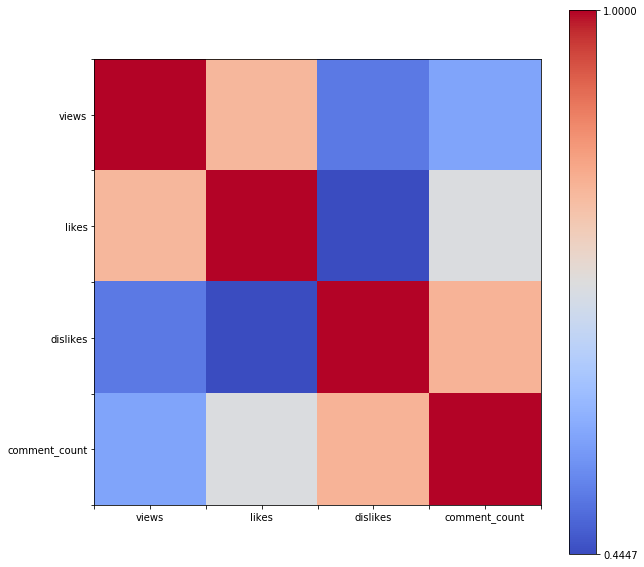

In [36]:
fig, ax = plt.subplots()
heatmap = ax.imshow(corr_matrix, interpolation='nearest', cmap=cm.coolwarm)

# making the colorbar on the side
cbar_min = corr_matrix.min().min()
cbar_max = corr_matrix.max().max()
cbar = fig.colorbar(heatmap, ticks=[cbar_min, cbar_max])

# making the labels
labels = ['']
for column in keep_columns:
    labels.append(column)
    labels.append('')
ax.set_yticklabels(labels, minor=False)
ax.set_xticklabels(labels, minor=False)
plt.show()


In [38]:
print(my_dfus.shape)
my_dfus = my_dfus[~my_dfus.index.duplicated(keep='last')]
print(my_dfus.shape)
my_dfus.index.duplicated().any()

(26151, 17)
(5002, 17)


False

Here Visualization starts
statistics of different attributes is acquired from the below defined function

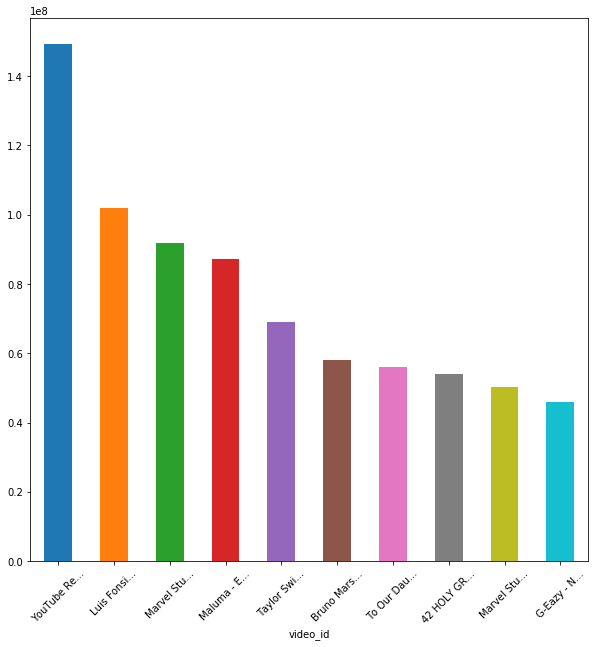

In [39]:
def visualize_most(my_df, column, num=10): # getting the top 10 videos by default
    sorted_df = my_df.sort_values(column, ascending=False).iloc[:num]
    
    ax = sorted_df[column].plot.bar()
    #print sorted_df
    #print ax
    # customizes the video titles, for asthetic purposes for the bar chart
    labels = []
    for item in sorted_df['title']:
        labels.append(item[:10] + '...')
    ax.set_xticklabels(labels, rotation=45, fontsize=10)
    
    plt.show()
    
visualize_most(my_dfus, 'views')


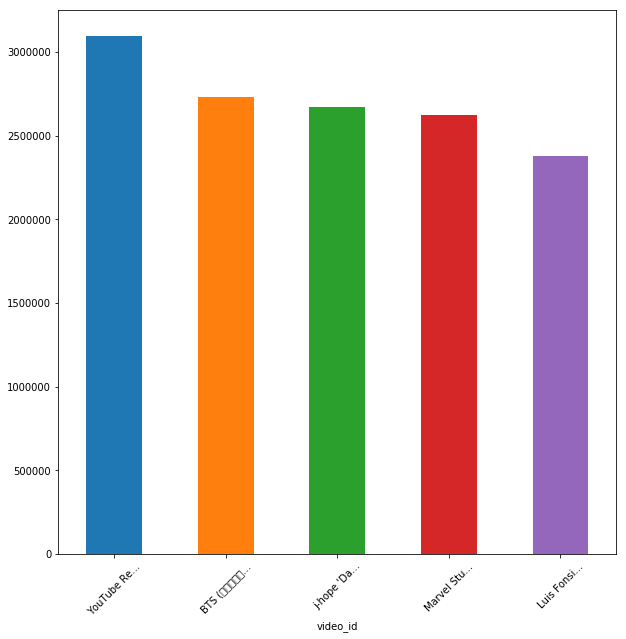

In [40]:
visualize_most(my_dfus, 'likes', num=5) # only visualizes the top 5

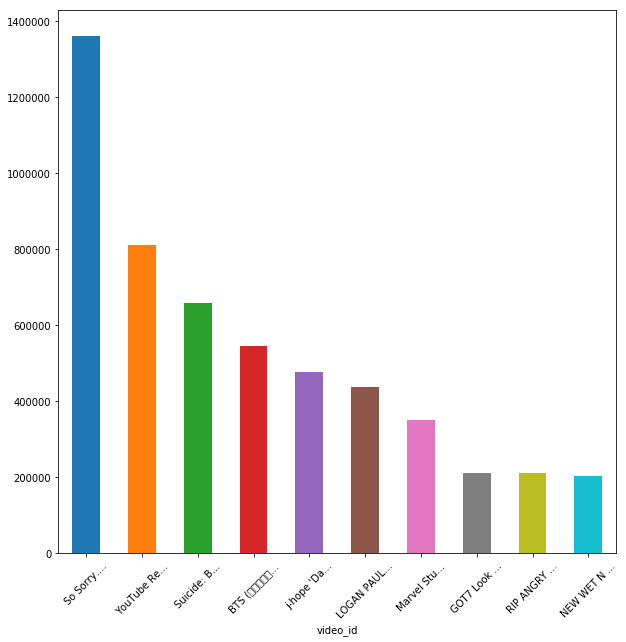

In [41]:
visualize_most(my_dfus, 'comment_count')

Category wise comparison

In [48]:
category_count = my_dfus['category'].value_counts() # frequency for each category
category_count

Entertainment            1233
Music                     617
Howto & Style             467
News & Politics           446
Comedy                    420
People & Blogs            391
Sports                    347
Science & Technology      319
Film & Animation          247
Education                 199
Pets & Animals            121
Autos & Vehicles           66
Gaming                     61
Travel & Events            53
Nonprofits & Activism      13
Shows                       2
Name: category, dtype: int64

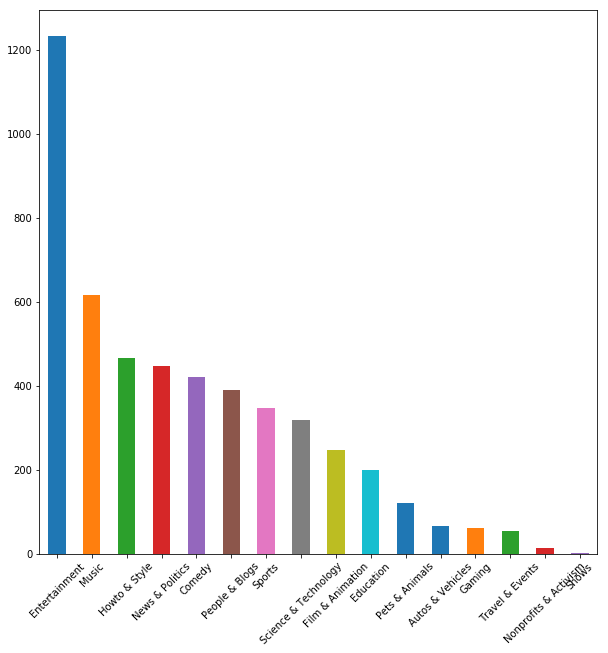

In [43]:
ax = category_count.plot.bar()
ax.set_xticklabels(labels=category_count.index, rotation=45, fontsize=10)

plt.show()